In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%cd "C:\Users\Gamer\Desktop\CISC 451\CISC451\project\data"
%matplotlib inline

C:\Users\Gamer\Desktop\CISC 451\CISC451\project\data


## Simple EDA of Team-Level Data
With event-level data already explored, the next layer of abstraction to explore is player-level information contained in the file 'teamstats_2017-2018_2018-2019.csv', which contains team-level aggregate information by unique game_id. Note that there are two records for each unique game_id, one for each team competing against each other 
- This short notebook serves to explore simple approaches similar to those existing to predict match outcome as a benchmark against which future models will be compared

In [2]:
# Once again, loading selected relevant datasets, this time for teams
# plays = pd.read_csv('plays_2017-2018_2018-2019.csv')
# games = pd.read_csv('games_2017-2018_2018-2019.csv')
# skater_stats = pd.read_csv('skaterstats_2017-2018_2018-2019.csv')
team_stats = pd.read_csv('teamstats_2017-2018_2018-2019.csv')
# s_info = pd.read_csv('player_info.csv') # static library of players
t_info = pd.read_csv('team_info.csv') # static library of teams

In [3]:
team_stats = team_stats.merge(t_info,on='team_id') # merge with team metadata
team_stats.columns

Index([&#39;game_id&#39;, &#39;team_id&#39;, &#39;HoA&#39;, &#39;won&#39;, &#39;settled_in&#39;, &#39;head_coach&#39;, &#39;goals&#39;,
       &#39;shots&#39;, &#39;hits&#39;, &#39;pim&#39;, &#39;powerPlayOpportunities&#39;, &#39;powerPlayGoals&#39;,
       &#39;faceOffWinPercentage&#39;, &#39;giveaways&#39;, &#39;takeaways&#39;, &#39;franchiseId&#39;,
       &#39;shortName&#39;, &#39;teamName&#39;, &#39;abbreviation&#39;, &#39;link&#39;],
      dtype=&#39;object&#39;)

Here we can clearly see the different categorical and numeric variables contained in each record. We want to use these to predict game outcome. For simplicity, let's consider a binary classification problem, where we only care about the 'won' column, and not whether or not the match was settled in regulation ('REG'), or overtime ('OT') 

In [4]:
team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,franchiseId,shortName,teamName,abbreviation,link
0,2017030241,28,away,False,REG,Peter DeBoer,0,33,33,31,5,0,47.8,8,6,29,San Jose,Sharks,SJS,/api/v1/teams/28
1,2017030242,28,away,True,OT,Peter DeBoer,4,47,48,12,7,2,55.1,7,12,29,San Jose,Sharks,SJS,/api/v1/teams/28
2,2017030243,28,home,False,OT,Peter DeBoer,3,42,44,12,4,1,57.7,13,14,29,San Jose,Sharks,SJS,/api/v1/teams/28
3,2017030244,28,home,True,REG,Peter DeBoer,4,34,31,22,5,1,55.7,4,7,29,San Jose,Sharks,SJS,/api/v1/teams/28
4,2017030245,28,away,False,REG,Peter DeBoer,3,30,35,20,4,1,49.3,7,4,29,San Jose,Sharks,SJS,/api/v1/teams/28


Like player-level and event-driven data previously explored, this dataset could be explored in a similar fashion, but we are interested in better understanding the contributing factors to the match result. So, let's condense the existing dataset by selecting some features to construct a simple Logistic Regression model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
features = team_stats[['goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways']] # our independent features
results = team_stats[['won']] # our target

x_train,x_test,y_train,y_test = train_test_split(features,results,test_size=0.3) # validate on 30% of dataset 
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

In [6]:
pred = lr_clf.predict(x_test)
accuracy_score(y_test,pred)

0.7942260442260443

In [7]:
# Let's create a confusion matrix for this model
confusion_matrix(y_test,pred)

array([[664, 158],
       [177, 629]], dtype=int64)

&lt;sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x4059388&gt;

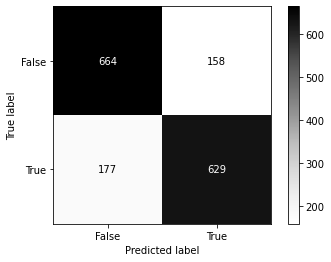

In [8]:
plot_confusion_matrix(lr_clf,x_test,y_test,cmap=plt.cm.Greys)

In [ ]:
#TODO: Plot ROC